# **Image Segmentation with Watershed Algorithm**

## **Goal**

In this chapter,
* We will learn how to use marker-based image segmentation using the watershed algorithm.
* Example codes using watershed algorithms.

## **Introduction**

The watershed is a classical algorithm used mainly for **segmentation**, i.e., for separating different objects in an image. Starting from the user-defined markers, watershed algorithm treats pixel values as a local topography.  

Any grayscale image can be viewed as a topographic surface where a high intensity denotes peaks and hills, while low intensity denotes the valleys. You then start filling every isolated valleys (**local minima**) with different colored water (**labels**). As the water rises, depending upon the peaks (**gradients**) nearby, the water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in locations where the water merges. You continue the work of filling the water and building the barriers until all peaks are under the water. Then the barriers that you have created will give you the segmentation result. This is the philosophy behind watershed principle.

But this approach gives you an over-segmented result due to noise or any other irregularities in the image. So, OpenCV implemented a marker-based watershed algorithm where you specify which are all the valley points that are to be merged and which are not. It is a type of **interactive image segmentation**.

## **Marker-based watershed algorithm**

**OpenCV** has implemented a marker-based watershed algorithm where we will specify which valley points are to be merged and which are not to be merged. It is not an automatic type but an interactive type of image segmentation.

The word **marker-based** means - labelling where the region is a foreground or a background, and to give different labels for the objects that we know. Using one color (**intensity**), we label the region which we are sure of being a foreground or being a background with another color. Then, for the region where we are not sure of anything, we have to label it with 0. That will be our marker.

After that, we will apply watershed algorithm. Then our marker will be updated with the labels that we gave, and the boundaries of all objects will have a value equal to **-1**.

This scenario explains that "Marker-based watershed algorithm" is based on Image Segmentation with Watershed Algorithm.

## **Code**

Here, we will see an example on how to use the **Distance Transform** along with the watershed algorithm to segment mutually touching objects.

Consider the below coins image. Here, the coins are touching each other. Even if you threshold it, it will still be touching each other.

We shall start by finding an approximate estimate of the coins. For that, we will use the **Otsu's binarization** technique.

## **Thresholding the Input**

Below is the picture before applying Otsu's thresholding:

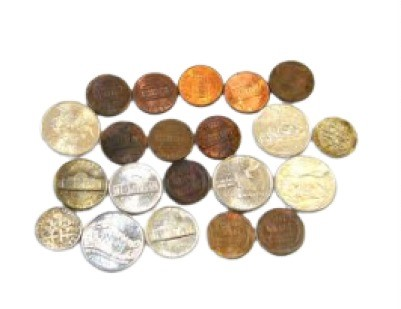
#### <center>Input Image<center>

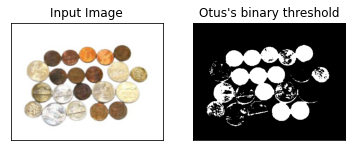

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv.imread('C:/Users/mrsam/Downloads/Dev_coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()

The right side of the image above is the output image after applying Otsu's Thresholding.

## **Noise removal using morphologyEx()**

To remove any unwanted noise, we use **morphologyEx()**

This can be performed using 2 methods:
1. **Opening**
2. **Closing**

Here is the code:

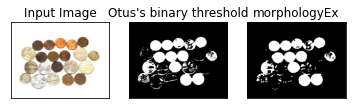

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv.imread('C:/Users/mrsam/Downloads/Dev_coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)

opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
#closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

plt.subplot(131),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(opening, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.show()

The above output is obtained when the **Opening** effect is applied to the sample.  
But, the Opening does not seem to be working even with 2x2 kernel, rather it's gotten worse.

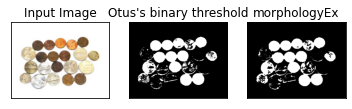

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv.imread('C:/Users/mrsam/Downloads/Dev_coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)

#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

plt.subplot(131),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.show()

The above output is obtained when the **Closing** effect is applied to the sample.  
But, the Closing seems to be working fairly better and even with 2x2 kernel.

## **Dilation**

The dilation operation comprises of convoluting an _**image A**_ with some _**kernel (B)**_, which may have any shape or size, but usually a square or a circle.

The kernel B has a well-defined anchor point, usually being at the center of the kernel.

As the kernel B is scanned over the image, we will compute the maximal pixel value overlapped by B and then replace the image pixel in the anchor point position with that maximal value. As we can deduce, this maximizing operation will cause bright regions within an image to grow. (hence the name **dilation**).

When dilation is applied to the sample, we get:

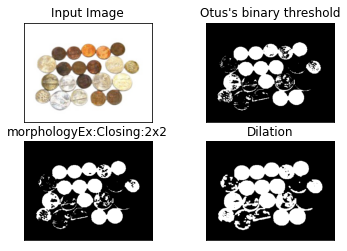

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv.imread('C:/Users/mrsam/Downloads/Dev_coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)

#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

plt.subplot(221),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.show()

## **Distance Transform & Threshold**

We used the following code below for the **Distance Transform**:

`# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)`

Then, we perform **Thresholding** with the following code:

`# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)`

The full code which involves Distance Transform and Thresholding techniques looks like this below:

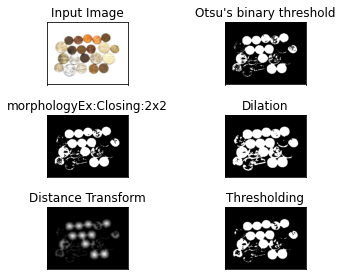

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv.imread('C:/Users/mrsam/Downloads/Dev_coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)

#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

plt.subplot(321),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(323),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## **Marker-based Watershed**

The Final code looks like:

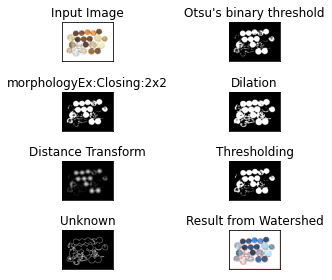

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv.imread('C:/Users/mrsam/Downloads/Dev_coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)

#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(421),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(428),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

The result obtained doesn't look successful as expected during the process, especially during the Dilation and Thresholding process. We have used very small dilation and threshold. Probably, most failures occured due to the glossy coins. So, we had to come up with a method to deal with those coins, therefore **Marker-based Watershed Algorithm** was used to obtain the required results.